<a href="https://colab.research.google.com/github/nazalves/dataset_publico/blob/master/Analisando_a_Viol%C3%AAncia_em_Minas_Gerais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência em Minas Gerais

A violência é um assunto recorrente em nossa sociedade e faz parte da plataforma política de todos os governos.
Neste estudo preliminar,  vamos analisar o comportamento da violência nos municípios do Estado de Minas Gerais, que tem uma das melhores policias no Brasil, e visualizar através dos dados, qual o retrato que nos é revelado da violência no estado de Minas Gerais.

<center><img alt="" width="20%" src="https://github.com/nazalves/proj_data_science/blob/master/Capa_CrimeMG.png?raw=true"></center>


## Obtenção dos Dados

A fonte de dados utilizada neste estudo foi obtida no site da SEJUSP - Secretaria de Estado de Justiça e Segurança Pública de Minas Gerais (*http://www.seguranca.mg.gov.br/2018-08-22-13-39-06/dados-abertos*), que tem uma área de dados abertos para os cidadãos e do site do IBGE (*https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados*), onde  retirei as informações de estimativa da população dos municípios de Minas Gerais.

A visão da SEJUSP:

> *Ser reconhecida em âmbito nacional e particularmente pela sociedade mineira como instituição de excelência nas ações de integração dos órgãos de Segurança Pública na custódia e ressocialização do indivíduo privado de liberdade, no rompimento da trajetória infracional do jovem em conflito com a lei e com a prevenção à criminalidade, reduzindo a criminalidade e aumentando a sensação de segurança da população.*







### Dados Abertos
Dados abertos governamentais são os dados públicos, produzidos ou sob a tutela do governo, que
devem ser disponibilizados ao cidadão para qualquer fim.

Para análise exploratória, fiz uma junção em dois arquivos *csv* dos dados disponibilizados pela **SEJUSP** a saber:
* *Crimes Violentos*
* *Crimes Violentos - Vítimas de Homicídio Consumado*
* *Outras Naturezas*

Estes três dataset foram juntados no arquivo  [Banco_Crimes_Vitma_MG.csv](https://www.dropbox.com/s/e4nisrbpgrc3l73/Banco_Crimes_Vitma_MG.csv?dl=1) dispnível no dropbox.

* *Estratificação de Roubos por Alvo*
* *Estratificação de Furtos por Alvo*
* *Veículos roubados*
* *Veículos furtados* 

Estes quatro dataset foram juntados no arquivo  [Banco_Crimes_Alvo_MG.csv](https://www.dropbox.com/s/e4nisrbpgrc3l73/Banco_Crimes_Alvo_MG.csv?dl=1)) dispnível no dropbox.

Carreguei também um outro *Dataset* [Populacao_Municipios_MG.xlsx](https://github.com/nazalves/dataset_publico/blob/master/Populacao_Municipios_MG.xlsx), que é um arquivo que preparei a partir dos dados obitdo no site do IBGE com a população de cada município de Minas Gerais, para que o *Cod IBGE* do município tivesse o mesmo formato do atributo dos dados da SEJUSP.


### Importando os dados



In [1]:
#importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snd
import numpy as np
import re


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importando o arquivo Banco_Crimes_Vitma_MG.csv para o DataFrame df
df = pd.read_csv("https://www.dropbox.com/s/ygrp7qyzqbzpxkz/Banco_Crimes_Vitma_MG.csv?dl=1",sep=";", encoding="ISO-8859-1")


In [3]:
#importando o arquivo Banco_Crimes_Alvo_MG.csv para o DataFrame df2
df2 = pd.read_csv("https://www.dropbox.com/s/ltrmq8yyd0xo36d/Banco_Crimes_Alvo_MG.csv?dl=1",sep=";",encoding="ISO-8859-1")

In [4]:
# importando arquivo Populacao_Municipios_MG.xlsx para o DataFrame df_pop_mg
df_pop_mg = pd.read_excel("https://github.com/nazalves/dataset_publico/blob/master/Populacao_Municipios_MG.xlsx?raw=true")

## Análise Inicial dos Dados

Esta etapa tem por objetivo entender como os dados estão estruturados e estabelecer uma situação incial mais consistente.

In [5]:
#verificando as 5 primeiras linhas do DataFrame df
df.head()

,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2018,10,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2018,7,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2018,12,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2018,12,12,NÃO
4,0,Estupro Consumado,ACUCENA,310050,1,2018,12,12,NÃO


In [6]:
#verificando as 5 primeiras linhas do DataFrame df2
df2.head()

,Registros,Natureza,Alvos,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Roubo,Veículos,ABADIA DOS DOURADOS,310010,1,2015,10,10,NÃO
1,1,Roubo,Veículos,ABAETE,310020,1,2015,7,7,NÃO
2,0,Roubo,Veículos,ABRE-CAMPO,310030,1,2015,12,12,NÃO
3,0,Roubo,Veículos,ACAIACA,310040,1,2015,12,12,NÃO
4,0,Roubo,Veículos,ACUCENA,310050,1,2015,12,12,NÃO


In [7]:
#verificando as 5 primeiras linhas do DataFrame df_pop_mg
df_pop_mg.head()

,UF,Cod_IBGE,Município,Pop_Estimada
0,MG,310010,Abadia dos Dourados,6989
1,MG,310020,Abaeté,23237
2,MG,310030,Abre Campo,13454
3,MG,310040,Acaiaca,3994
4,MG,310050,Açucena,9470


### Ajustes e junção dos dataframes carregados

Podemos constatar pelas primeiras linhas que os DataFrames *df* e *df2* tem estruturas diferentes. Vamos verificar os atributos de cada um deles e ver a possibilidade de unir em um único DataFrame.

O DataFrame *df* tem 9 atributos e o *df2* tem 10 atributos, a diferença é a coluna *Alvos* que não tem no *df* porque todos os alvos são pessoas, por se tratar do arquivo de *crimes com vítmas*. 

O DataFrame *df_pop_mg* tem a população de cada muniípio de Minas Gerais, e podemos identificar os município em todos os dataframes pela coluna *Cod_IBGE*. Faremos isto para criar o dataset limpo e com todas as informações necessárias para análise.

In [8]:
# Verificando as colunas dos dois DataFrames
print('\n','Colunas do dataframe df -->',df.columns,'\n','Colunas do dataframe df2 -->', df2.columns, '\n')
print("Registros df:\t {}".format(df.shape[0]), " - Features df:\t {}\n".format(df.shape[1]))
print("Registros df2:\t {}".format(df2.shape[0]), " - Features df2:\t {}".format(df2.shape[1]))


 Colunas do dataframe df --> Index(['Registros', 'Natureza', 'Município', 'Cod IBGE', 'Mês ', 'Ano', 'RISP',
       'RISP Nova', 'RMBH'],
      dtype='object') 
 Colunas do dataframe df2 --> Index(['Registros', 'Natureza', 'Alvos', 'Município', 'Cod IBGE', 'Mês ',
       'Ano', 'RISP', 'RISP Nova', 'RMBH'],
      dtype='object') 

Registros df:	 580037  - Features df:	 9

Registros df2:	 665340  - Features df2:	 10


Vamos criar uma coluna no DataFrame *df* e depois inserir os dados do DataFrame *df2* no *df*.

In [9]:
#Verificando o número de colunas e registros antes da alteração
print("Registros antes:\t {}".format(df.shape[0]))
print("Features antes:\t {}\n".format(df.shape[1]))

#Inserindo coluna Alvo na mesma posição do dataframe df2
df.insert(2,'Alvos','Pessoas')

#Inserindo o dataframe df2 no df através do comando append
df = df.append(df2, ignore_index=True)

#Verificando o npumero de colunas e registros de pois da alteração
print("Registros depois:\t {}".format(df.shape[0]))
print("Features depois:\t {}\n".format(df.shape[1]))




Registros antes:	 580037
Features antes:	 9

Registros depois:	 1245377
Features depois:	 10



Acerto do nome da feature *'Mês '* para 'Mes' e *'Cod IBGE'* para *'Cod_IBGE'*, por uma questão de comodidade para trabalhar com estas *features*.

In [10]:
# Comando para alteração do nome das colunas 
df = df.rename(columns={'Mês ':'Mes'})
df = df.rename(columns={'Cod IBGE':'Cod_IBGE'})

#Comando para verificação se o nome foi alterado
df.columns

Index(['Registros', 'Natureza', 'Alvos', 'Município', 'Cod_IBGE', 'Mes', 'Ano',
       'RISP', 'RISP Nova', 'RMBH'],
      dtype='object')

In [11]:
#Identificando o volume de dados do DataFrame
print("Registros:\t {}".format(df.shape[0]))
print("Features:\t {}\n".format(df.shape[1]))

Registros:	 1245377
Features:	 10



#### Análise das features (colunas)

In [12]:
#Extraindo informações do DataFrame
df.info(buf = None,memory_usage=False,null_counts=False);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245377 entries, 0 to 1245376
Data columns (total 10 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Registros  int64 
 1   Natureza   object
 2   Alvos      object
 3   Município  object
 4   Cod_IBGE   int64 
 5   Mes        int64 
 6   Ano        int64 
 7   RISP       int64 
 8   RISP Nova  int64 
 9   RMBH       object
dtypes: int64(6), object(4)

O volume do *Dataset* carregado tem 1.245.377 registros e 10 colunas

##### Dicionário de features.

*   **Registros** --> Quantidade de ocorrências - *Tipo Integer*
*   **Natureza** --> Tipo de crime - *Tipo String*
*   **Alvo**--> O que foi objeto do crime - *Tipo String*
*   **Município** --> Descrição do município da ocorrência - *Tipo String*
*   **Cod_IBGE** --> Identificação do município no IBGE - *Tipo Integer*
*   **Mes** --> Mês da ocorrência - *Tipo Integer*
*   **Ano** --> Ano da ocrrência - *Tipo Integer*
*   **RISP** --> Região integrada de segurança pública - *Tipo Integer*
*   **RISP Nova** --> Região integrada de segurança pública (Atualização do código) - *Tipo String*
*   **RMBH** --> Região Metropolitana de Belo Horizonte - *Tipo String*

A variável *Registros* que aponta o número de ocorrência de um determinado crime. Desta forma vou criar um novo DataFrame limpando as linhas cujo *Registros* seja igual a zero.

In [13]:
# Verficação da quantidade de linhas com valor igual a zero na feature Registros
df.loc[(df.Registros==0)].count()

Registros    885901
Natureza     885901
Alvos        885901
Município    885901
Cod_IBGE     885901
Mes          885901
Ano          885901
RISP         885901
RISP Nova    885901
RMBH         885901
dtype: int64

#### Limpeza e merge (junção) dos DataFrame

In [14]:
# criando uma cópia do dataframe com o nome df_Registros
df_Registros = df.copy()

# removendo as linhas (axis=0) onde a coluna Registros = 0
df_Registros.drop(df_Registros[df_Registros.Registros == 0].index, axis=0,inplace=True)


## Informações Estatísticas da Violência em Minas Gerais

A métrica que utilizaremos de referência será a coluna *Registros* e faremos uma exploração agrupoado pelos tipos de crime, identificado na coluna *Natureza*, por Município e como estes valores variaram no tempo.



In [15]:
#Identificando o domínio da variável categórica Natureza
df_Registros.Natureza.unique()


array(['Estupro Consumado', 'Estupro de Vulnerável Consumado',
       'Estupro de Vulnerável Tentado', 'Estupro Tentado',
       'Extorsão Mediante Sequestro Consumado', 'Homicídio Tentado',
       'Roubo Consumado', 'Sequestro e Cárcere Privado Consumado',
       'Extorsão Consumado', 'Roubo Tentado',
       'Homicídio Consumado (Registros)', 'Extorsão Tentado',
       'Sequestro e Cárcere Privado Tentado', 'Furto Consumado',
       'Lesão Corporal Consumado', 'Vítima de Homicídio Consumado',
       'Roubo', 'Furto'], dtype=object)

Vamos fazer uma análise nos crimes violentos que são tipificados  como *Homicídio Consumado (Registros)* e *Homicídio Tentado*.

O Dataset tem registros destes dados a partir do ano de 2018 e o ano de 2020 tem dados até o mês de *Maio* . Certamente quando os dados de Homicídio passaram a ter esta classificação.

Vamos constatar uma queda na quantidade de *Homicídios* a cada ano, considerando em 2020 temo os dados dos 5 primeiros meses.

In [18]:
# Verificando a quantidade de homicídios por natureza

df_Registros.loc[(df_Registros.Natureza.str \
                  .contains('Homicídio'))] \
                  .groupby(['Ano','Natureza']).Registros.sum()

Ano   Natureza                       
2012  Vítima de Homicídio Consumado      4009
2013  Vítima de Homicídio Consumado      4333
2014  Vítima de Homicídio Consumado      4259
2015  Vítima de Homicídio Consumado      4165
2016  Vítima de Homicídio Consumado      4181
2017  Vítima de Homicídio Consumado      3953
2018  Homicídio Consumado (Registros)    2948
      Homicídio Tentado                  3523
      Vítima de Homicídio Consumado      3077
2019  Homicídio Consumado (Registros)    2644
      Homicídio Tentado                  2855
      Vítima de Homicídio Consumado      2722
2020  Homicídio Consumado (Registros)    1098
      Homicídio Tentado                  1045
      Vítima de Homicídio Consumado      1138
Name: Registros, dtype: int64

In [19]:
# média de crimes violentos (Homicídio Consumado (Registros),Homicídio Tentado) nos anos 2018 a 2020

print('Dados estatísticos de Homícidios no ano\n')
print('Total de Homicídios em 2018: \n',df_Registros.loc[(df_Registros.Ano == 2018) & \
       (df_Registros.Natureza.isin(["Homicídio Consumado (Registros)","Homicídio Tentado"]))].Registros.sum(),'\n');
print('em 2018: \n',df_Registros.loc[(df_Registros.Ano == 2018) &  \
       (df_Registros.Natureza.isin(["Homicídio Consumado (Registros)","Homicídio Tentado"]))].Registros.describe(),'\n');
print('Total de Homicídios em 2019: \n',df_Registros.loc[(df_Registros.Ano == 2019) & \
       (df_Registros.Natureza.isin(["Homicídio Consumado (Registros)","Homicídio Tentado"]))].Registros.sum(),'\n');
print('em 2019: \n',df_Registros.loc[(df_Registros.Ano == 2019) & \
       (df_Registros.Natureza.isin(["Homicídio Consumado (Registros)","Homicídio Tentado"]))].Registros.describe(),'\n');
print('Total de Homicídios em 2020: \n',df_Registros.loc[(df_Registros.Ano == 2020) & \
       (df_Registros.Natureza.isin(["Homicídio Consumado (Registros)","Homicídio Tentado"]))].Registros.sum(),'\n');
print('em 2020 (até Maio): \n',df_Registros.loc[(df_Registros.Ano == 2020) & \
       (df_Registros.Natureza.isin(["Homicídio Consumado (Registros)","Homicídio Tentado"]))].Registros.describe(),'\n');



Dados estatísticos de Homícidios no ano

Total de Homicídios em 2018: 
 6471 

em 2018: 
 count    3055.000000
mean        2.118167
std         3.556097
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        56.000000
Name: Registros, dtype: float64 

Total de Homicídios em 2019: 
 5499 

em 2019: 
 count    2785.000000
mean        1.974506
std         3.197700
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        41.000000
Name: Registros, dtype: float64 

Total de Homicídios em 2020: 
 2143 

em 2020 (até Maio): 
 count    1091.000000
mean        1.964253
std         3.202294
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        38.000000
Name: Registros, dtype: float64 



 Para conseguirmos comparar os municípios mais violentos, temos que levar em consideração a população do Município, assim vamos calcular a *taxa de Homicídio por 100.000 habitantes* , desta forma vamos filtrar os municípios com mais de 100.000 habitantes e verificar quais tem as maiores e menores taxa de homicídio.

 Cálculo da taxa de crime por 100.000 habitantes será utilizada para comparar os números entre os municípios:
* $\frac{\text{Registros}}{\text{Populacao_Município}}\text{. 100.000}$





Merge do dataframe df_registro e df_pop_mg em um novo dataframe *df_analise* 

In [20]:
# Merge do dataframe com os crimes e o dataframe com a população dos municípios
df_mais_pop = pd.merge(df_Registros,df_pop_mg[['Cod_IBGE','Pop_Estimada']], on='Cod_IBGE')
df_mais_pop.head()

,Registros,Natureza,Alvos,Município,Cod_IBGE,Mes,Ano,RISP,RISP Nova,RMBH,Pop_Estimada
0,1,Estupro Consumado,Pessoas,ALFENAS,310160,1,2018,18,18,NÃO,79996
1,2,Estupro de Vulnerável Consumado,Pessoas,ALFENAS,310160,1,2018,18,18,NÃO,79996
2,2,Estupro Tentado,Pessoas,ALFENAS,310160,1,2018,18,18,NÃO,79996
3,25,Roubo Consumado,Pessoas,ALFENAS,310160,1,2018,18,18,NÃO,79996
4,1,Roubo Tentado,Pessoas,ALFENAS,310160,1,2018,18,18,NÃO,79996


In [21]:
# Criando um dataframe somente com os homicídios

df_homicidio = df_mais_pop.loc[(df_mais_pop.Natureza.isin(["Homicídio Consumado (Registros)","Homicídio Tentado"]))] \
.groupby(['Ano','Mes','Município']).agg({'Registros':np.sum,'Pop_Estimada':np.max})
df_homicidio.reset_index(inplace=True)
df_homicidio.head()


,Ano,Mes,Município,Registros,Pop_Estimada
0,2018,1,AGUAS FORMOSAS,2,19207
1,2018,1,AIMORES,2,25167
2,2018,1,ALEM PARAIBA,1,35362
3,2018,1,ALMENARA,2,41896
4,2018,1,ALPINOPOLIS,1,19853


In [22]:
# Filtrando algumas linhas para verificação

df_mais_pop.loc[(df_mais_pop.Município=='BETIM') & \
                (df_mais_pop.Natureza.isin(["Homicídio Consumado (Registros)","Homicídio Tentado"]))] \
                .groupby(['Ano','Mes','Município']).agg({'Registros':np.sum,'Pop_Estimada':np.max})[:5]

Registros  Pop_Estimada
Ano  Mes Município                         
2018 1   BETIM             37        439340
     2   BETIM             16        439340
     3   BETIM             23        439340
     4   BETIM             17        439340
     5   BETIM             13        439340

In [23]:
# criar coluna com o cálculo da taxa de homcícidios por 100000 habitantes

df_homicidio['tx_por_100k'] = round((df_homicidio.Registros / df_homicidio.Pop_Estimada)*100000,2)


In [54]:
# Verificando OS Top 10 de 2018 no dataframe após criação da coluna tx_por_100k

df_homicidio.loc[(df_homicidio.Ano==2018) & (df_homicidio.Pop_Estimada >= 100000)] \
.groupby(['Município']).tx_por_100k.sum() \
.sort_values(ascending = False).reset_index()[:10]


,Município,tx_por_100k
0,GOVERNADOR VALADARES,70.74
1,NOVA SERRANA,63.30
2,SABARA,56.45
3,RIBEIRAO DAS NEVES,53.74
4,CONTAGEM,52.13
5,BETIM,51.20
6,SANTA LUZIA,44.26
7,VESPASIANO,43.11
8,ARAGUARI,42.63
9,DIVINOPOLIS,38.22


In [56]:

print('Cidades mais violentas de MG por Ano com mais de 100.000 habitantes\n')
print(df_homicidio.loc[(df_homicidio.Ano==2018) & (df_homicidio.Pop_Estimada >= 100000)] \
      .groupby(['Ano','Município']).agg({'Pop_Estimada':np.max,'Registros':np.sum,'tx_por_100k':np.sum}).sort_values(by=['tx_por_100k','Ano'],ascending=False)[:5],'\n')
print(df_homicidio.loc[(df_homicidio.Ano==2019) & (df_homicidio.Pop_Estimada >= 100000)] \
      .groupby(['Ano','Município']).agg({'Pop_Estimada':np.max,'Registros':np.sum,'tx_por_100k':np.sum}).sort_values(by=['tx_por_100k','Ano'],ascending=False)[:5],'\n')
print(df_homicidio.loc[(df_homicidio.Ano==2020) & (df_homicidio.Pop_Estimada >= 100000)] \
      .groupby(['Ano','Município']).agg({'Pop_Estimada':np.max,'Registros':np.sum,'tx_por_100k':np.sum}).sort_values(by=['tx_por_100k','Ano'],ascending=False)[:5],'\n')
print('Cidades menos violentas de MG por Ano com mais de 100.000 habitantes\n')
print(df_homicidio.loc[(df_homicidio.Ano==2018) & (df_homicidio.Pop_Estimada >= 100000)] \
      .groupby(['Ano','Município']).agg({'Pop_Estimada':np.max,'Registros':np.sum,'tx_por_100k':np.sum}).sort_values(by=['tx_por_100k','Ano'],ascending=True)[:5],'\n')
print(df_homicidio.loc[(df_homicidio.Ano==2019) & (df_homicidio.Pop_Estimada >= 100000)] \
      .groupby(['Ano','Município']).agg({'Pop_Estimada':np.max,'Registros':np.sum,'tx_por_100k':np.sum}).sort_values(by=['tx_por_100k','Ano'],ascending=True)[:5],'\n')
print(df_homicidio.loc[(df_homicidio.Ano==2020) & (df_homicidio.Pop_Estimada >= 100000)] \
      .groupby(['Ano','Município']).agg({'Pop_Estimada':np.max,'Registros':np.sum,'tx_por_100k':np.sum}).sort_values(by=['tx_por_100k','Ano'],ascending=True)[:5],'\n')



Cidades mais violentas de MG por Ano com mais de 100.000 habitantes

                           Pop_Estimada  Registros  tx_por_100k
Ano  Município                                                 
2018 GOVERNADOR VALADARES        279885        198        70.74
     NOVA SERRANA                102693         65        63.30
     SABARA                      136344         77        56.45
     RIBEIRAO DAS NEVES          334858        180        53.74
     CONTAGEM                    663855        346        52.13 

                           Pop_Estimada  Registros  tx_por_100k
Ano  Município                                                 
2019 GOVERNADOR VALADARES        279885        184        65.72
     SABARA                      136344         60        44.00
     RIBEIRAO DAS NEVES          334858        145        43.30
     VESPASIANO                  127601         49        38.39
     BETIM                       439340        165        37.56 

                           Pop_

A capital de Minas Gerais, **Belo Horioznte** com relação a taxa de homicídios por 100.000 habitantes:

População Estimada de BH 2.512.070 habitantes (*IBGE 2019*):

*   2018 -  13ª posição
*   2019 -  17ª posição
*   2020 -  10ª posição (*dados apurados até o mês de maio*) 




In [125]:
# Cálculo da taxa média de homicídio do estado de MG

# Total de ocorrencias
print('Número de homicídios: ',df_homicidio.loc[(df_homicidio.Ano==2019) ].Registros.sum())
# Populcao estimada
print('População Estimada: ',df_pop_mg.Pop_Estimada.sum())
# Cálculo da taxa
print('Taxa por 100.000 habitantes: ', round(df_homicidio.loc[(df_homicidio.Ano==2019) ].Registros.sum()/df_pop_mg.Pop_Estimada.sum()*100000,2))

Número de homicídios:  5499
População Estimada:  21168791
Taxa por 100.000 habitantes:  25.98


Visualizando os municípios por ordem decrescente da taxa de homicício por 1000.000 habitantes.

In [135]:
# Verificação dos municípios

print('População de Belo Horizonte (*Ref. IBGE 2019): ',df_homicidio.Pop_Estimada.max())
print('Rank 2018: \n', df_homicidio.loc[(df_homicidio.Ano == 2018) & (df_homicidio.Pop_Estimada >= 100000)] \
.groupby(['Ano','Município','Pop_Estimada']).agg({'Registros':np.sum,'tx_por_100k':np.sum}) \
.sort_values(by=['tx_por_100k'],ascending = False).reset_index() [:20], '\n')
print('Rank 2019: \n', df_homicidio.loc[(df_homicidio.Ano == 2019) & (df_homicidio.Pop_Estimada >= 100000)] \
.groupby(['Ano','Município','Pop_Estimada']).agg({'Registros':np.sum,'tx_por_100k':np.sum}) \
.sort_values(by=['tx_por_100k'],ascending = False).reset_index() [:20], '\n')
print('Rank 2020: \n', df_homicidio.loc[(df_homicidio.Ano == 2020
) & (df_homicidio.Pop_Estimada >= 100000)] \
.groupby(['Ano','Município','Pop_Estimada']).agg({'Registros':np.sum,'tx_por_100k':np.sum}) \
.sort_values(by=['tx_por_100k'],ascending = False).reset_index() [:20], '\n')



População de Belo Horizonte (*Ref. IBGE 2019):  2512070
Rank 2018: 
      Ano             Município  Pop_Estimada  Registros  tx_por_100k
0   2018  GOVERNADOR VALADARES        279885        198        70.74
1   2018          NOVA SERRANA        102693         65        63.30
2   2018                SABARA        136344         77        56.45
3   2018    RIBEIRAO DAS NEVES        334858        180        53.74
4   2018              CONTAGEM        663855        346        52.13
5   2018                 BETIM        439340        225        51.20
6   2018           SANTA LUZIA        219134         97        44.26
7   2018            VESPASIANO        127601         55        43.11
8   2018              ARAGUARI        117267         50        42.63
9   2018           DIVINOPOLIS        238230         91        38.22
10  2018           SETE LAGOAS        239639         82        34.23
11  2018        PATOS DE MINAS        152488         51        33.44
12  2018        BELO HORIZONTE    

## Visualização de Dados

Podemos observar claramente, através do gráfico de linhas, a tendência de queda nos homicídios nos municípios do estado de MG, considerando os municípios com mais de 100.000 habitantes.


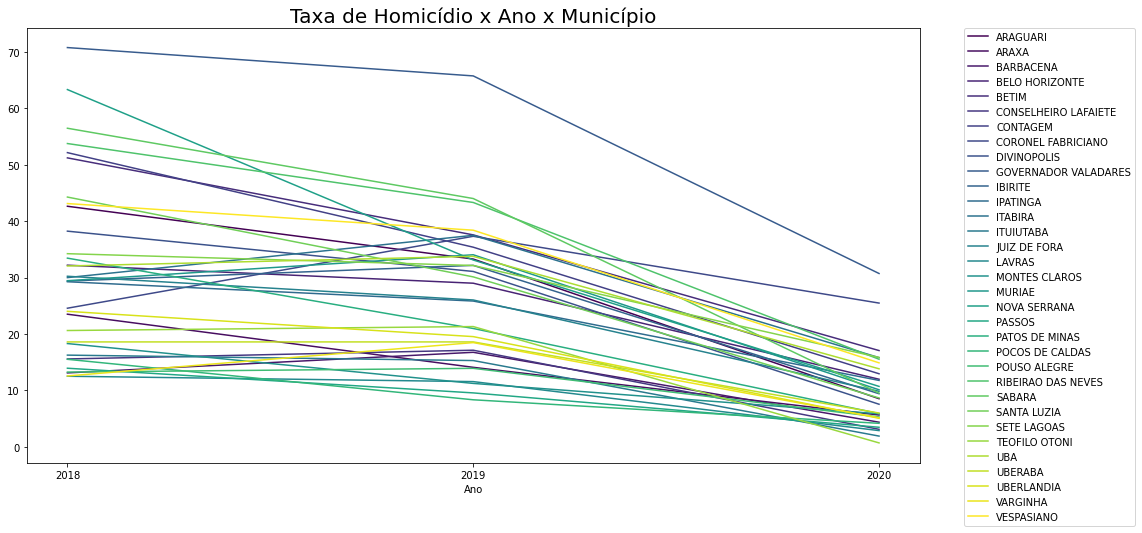

In [101]:
# Grafico de linhas taxa de homcício x ano x município

ax = pd.pivot_table(df_homicidio.loc[(df_homicidio.Pop_Estimada >= 100000)] \
               .groupby(['Ano','Município']).agg({'tx_por_100k':np.sum}) \
               .sort_values(by=['tx_por_100k','Ano'],ascending=False),index=["Ano"],columns=["Município"]) \
               .plot(figsize=(16,8), colormap='viridis')
ax.set_title('Taxa de Homicídio x Ano x Município', fontsize = 20)    

# acerto da escala do eixo x

plt.xticks([2018,2019,2020])

handles, labels = ax.get_legend_handles_labels()

#uso de regular expression para acerto da legenda

edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels,bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0.) ;

In [102]:
# Preparando dados para geração do gráfico barra horizontal

x_2018 = df_homicidio.loc[ (df_homicidio.Ano==2018) & (df_homicidio.Pop_Estimada >= 100000)]. \
               groupby(['Município']).agg({'tx_por_100k':np.sum}). \
               sort_values(by=['tx_por_100k'],ascending=False)[:5]
x_2018.reset_index(inplace=True)
x_2018.head()   

x_2019 = df_homicidio.loc[ (df_homicidio.Ano==2019) & (df_homicidio.Pop_Estimada >= 100000)]. \
               groupby(['Município']).agg({'tx_por_100k':np.sum}). \
               sort_values(by=['tx_por_100k'],ascending=False)[:5]
x_2019.reset_index(inplace=True)
x_2019.head() 

x_2020 = df_homicidio.loc[ (df_homicidio.Ano==2020) & (df_homicidio.Pop_Estimada >= 100000)]. \
               groupby(['Município']).agg({'tx_por_100k':np.sum}). \
               sort_values(by=['tx_por_100k'],ascending=False)[:5]
x_2020.reset_index(inplace=True)


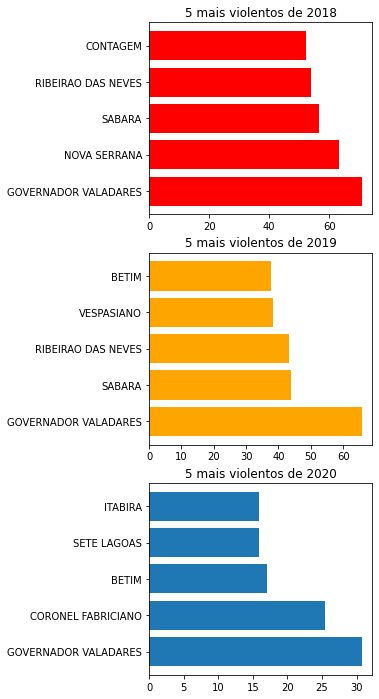

In [122]:
# Gráfico de barras horizonta das 5 cidades mais violentas por ano

fig, axs = plt.subplots(ncols=1, nrows=3,figsize=(4,12))
ax1, ax2, ax3 = axs.ravel()

ax1.barh(x_2018.Município,x_2018.tx_por_100k,color='Red')
ax1.set_title("5 mais violentos de 2018")
ax2.barh(x_2019.Município,x_2019.tx_por_100k,color='Orange')
ax2.set_title("5 mais violentos de 2019")
ax3.barh(x_2020.Município,x_2020.tx_por_100k)
ax3.set_title("5 mais violentos de 2020");



## Conclusão

Podemos perceber, com esta análise preliminar dos dados, uma diminuição de crimes violentos, mas especificamente *Homicídios consumados e Tentativa de Homicídios* no estado de MG, o que mostra que as ações da polícia vem surtindo efeito. 

A taxa média de homicídios no estado de MG em 2019 foi de **25,98** *homicídios por 100.000 habitantes*. A capital Mineira ficou em 2019 na 17ª posição com uma taxa de **29,00** *homicídios por 100.000 habitantes*.

O município de Governador Valadares, vem se mantendo na liderança do ranking de 2018 à 2020, em 2019 a taxa de homicídio foi de **65,72** por 100.000 habitantes. Mas também destacamos que os municípios da *Região Metropolitana de Belo Horizonte (Betim, Sabará, Contagem, Ribeirão das Neves e Vespasiano)* estão sempre figurando entre os mais violentos. 